## ASSIGNMENT 2 IVA

Lab Task 1: Setup and Basic **Extraction**

In [1]:
#1. Install ffmpeg and ffmpeg-python:
!apt update
!apt install -y ffmpeg
!pip install ffmpeg-python


Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Ign:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [908 kB]
Get:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Get:10 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Package

In [ ]:
import ffmpeg
import os

def extract_and_save_frames(video_path, output_dir, frame_rate=1):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    try:
        (
            ffmpeg
            .input(video_path)
            .filter('fps', fps=frame_rate)
            .output(f'{output_dir}/frame_%04d.png')
            .run(capture_stderr=True, capture_stdout=True)
        )
        print(f"Frames saved in {output_dir}")
    except ffmpeg.Error as e:
        print(f"An error occurred: {e.stderr.decode()}")

video_path = '/content/traf.mp4'
output_dir = 'extract and save'
extract_and_save_frames(video_path, output_dir, frame_rate=1)

Lab Task 2: Frame Type **Analysis**

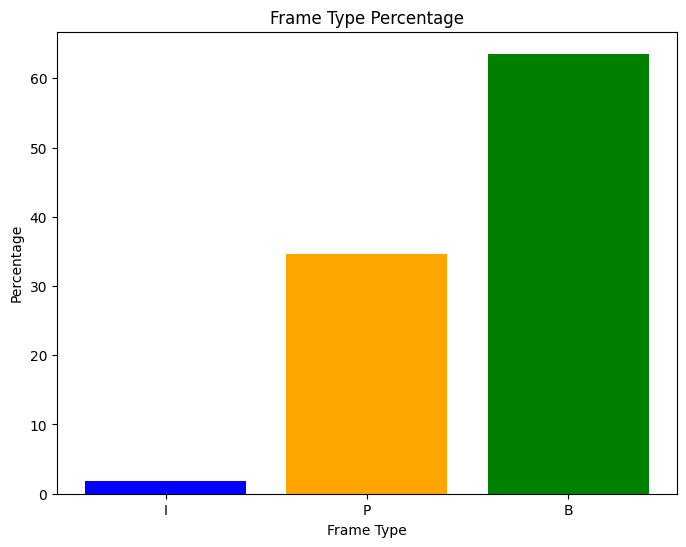

{'I': 1.8691588785046727, 'P': 34.57943925233645, 'B': 63.55140186915887}


In [9]:
import subprocess
import json
import matplotlib.pyplot as plt

def analyze_frame_types(video_path):
    command = ['ffprobe', '-v', 'error', '-select_streams', 'v:0', '-show_entries', 'frame=pict_type', '-of', 'json', video_path]
    result = subprocess.run(command, capture_output=True, text=True)
    frames_info = json.loads(result.stdout)
    frame_types = {'I': 0, 'P': 0, 'B': 0}

    for frame in frames_info['frames']:
        if 'pict_type' in frame:
            pict_type = frame['pict_type']
            if pict_type in frame_types:
                frame_types[pict_type] += 1

    total_frames = sum(frame_types.values())
    frame_percentages = {k: (v / total_frames) * 100 for k, v in frame_types.items()}

    return frame_percentages

def plot_bar_chart(frame_percentages):
    frame_labels = list(frame_percentages.keys())
    frame_values = [frame_percentages[frame] for frame in frame_percentages]
    plt.figure(figsize=(8, 6))
    plt.bar(frame_labels, frame_values, color=['blue', 'orange', 'green'])
    plt.xlabel('Frame Type')
    plt.ylabel('Percentage')
    plt.title('Frame Type Percentage')
    plt.show()

video_path = '/content/traf.mp4'
frame_percentages = analyze_frame_types(video_path)
plot_bar_chart(frame_percentages)
print(frame_percentages)


Lab Task 3: Visualizing **Frames**

In [ ]:
import subprocess
import os
def extract_frames(video_path, output_dir, frame_type):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    if frame_type == 'I':
        filter_expr = "select='eq(pict_type,I)'"
        output_pattern = 'I_frame_%04d.png'
    elif frame_type == 'P':
        filter_expr = "select='eq(pict_type,P)'"
        output_pattern = 'P_frame_%04d.png'
    elif frame_type == 'B':
        filter_expr = "select='eq(pict_type,B)'"
        output_pattern = 'B_frame_%04d.png'
    else:
        raise ValueError("Invalid frame type. Choose from 'I', 'P', or 'B'.")
    output_path = os.path.join(output_dir, output_pattern)
    command = [
        'ffmpeg', '-i', video_path, '-vf', filter_expr,'-vsync',
        'vfr',output_path]
    try:
        subprocess.run(command, check=True)
        print(f"Frames extracted to {output_dir}")
    except subprocess.CalledProcessError as e:
        print(f"Error extracting frames: {e}")
video_file = '/content/traf.mp4'
output_directory = 'frames'
extract_frames(video_file, output_directory, 'I')
extract_frames(video_file, output_directory, 'P')
extract_frames(video_file, output_directory, 'B')

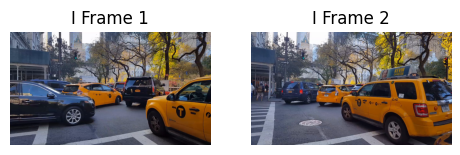

 I frames found.


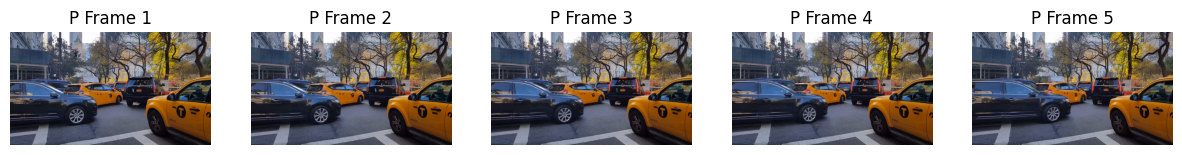

 P frames found.


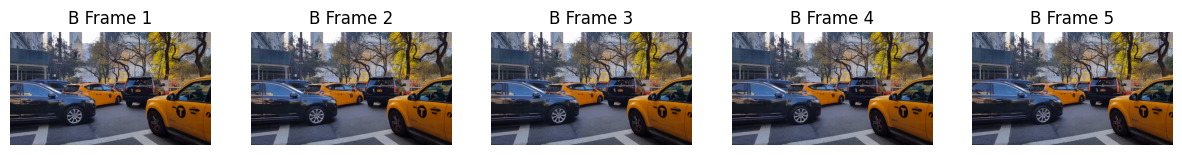

 B frames found.


In [11]:
import matplotlib.pyplot as plt
from PIL import Image
import glob

def display_frames(frame_dir, frame_type):
    frame_files = sorted(glob.glob(os.path.join(frame_dir, f'{frame_type}_frame_*.png')))
    if frame_files:
        plt.figure(figsize=(15, 5))
        for i, frame_file in enumerate(frame_files[:5]):
            img = Image.open(frame_file)
            plt.subplot(1, 5, i+1)
            plt.imshow(img)
            plt.axis('off')
            plt.title(f'{frame_type} Frame {i+1}')
        plt.show()
        print(f" {frame_type} frames found.")

display_frames(output_directory, 'I')
display_frames(output_directory, 'P')
display_frames(output_directory, 'B')

Lab Task 4: Frame Compression **Analysis**

In [12]:
import os
import glob

def calculate_frame_sizes(frame_dir, frame_type):
    frame_files = glob.glob(os.path.join(frame_dir, f'{frame_type}_frame_*.png'))
    if not frame_files:
        print(f"No {frame_type} frames found.")
        return 0, 0

    sizes = [os.path.getsize(frame_file) for frame_file in frame_files]
    avg_size = sum(sizes) / len(sizes)
    return avg_size, sizes
output_directory = 'frames'

avg_size_I, _ = calculate_frame_sizes(output_directory, 'I')
avg_size_P, _ = calculate_frame_sizes(output_directory, 'P')
avg_size_B, _ = calculate_frame_sizes(output_directory, 'B')

print(f"Average size of I frames: {avg_size_I / 1024:.2f} KB")
print(f"Average size of P frames: {avg_size_P / 1024:.2f} KB")
print(f"Average size of B frames: {avg_size_B / 1024:.2f} KB")

Average size of I frames: 3259.58 KB
Average size of P frames: 3644.33 KB
Average size of B frames: 3657.66 KB


##i)Role of Each Frame Type in Video Compression
I-Frames (Intra-coded frames):

Role: I-frames are self-contained frames that do not rely on other frames to be decoded. They store a complete image using spatial compression methods, such as JPEG-like techniques.

Usage: I-frames serve as reference points for P and B frames and are typically used at scene changes or intervals to facilitate random access and error recovery. They are crucial for ensuring video quality because they provide the full image data needed for accurate reconstruction of subsequent frames.

P-Frames (Predictive-coded frames):

Role: P-frames store only the difference between the current frame and a previous reference frame (usually the preceding I or P frame). They use temporal compression by exploiting redundancies between consecutive frames.

Usage: P-frames reduce the amount of data needed by predicting and encoding only the changes from the reference frame. This makes them smaller than I-frames and effective in sequences with gradual motion or changes.

B-Frames (Bidirectional-predictive-coded frames):

Role: B-frames use both previous and future frames as references to encode the differences. They can refer to both past and future I or P frames.

Usage: B-frames provide the highest level of compression because they can leverage temporal redundancies more effectively by comparing against multiple frames. This makes them especially useful in sequences with complex motion or scenes with high temporal redundancy.

###ii)Data Redundancy and Predictive Encoding:

P-Frames: Encode only differences from preceding I or P frames, eliminating redundant information and significantly reducing data compared to I-frames, which encode the entire frame independently.
B-Frames: Use both past and future reference frames for bidirectional prediction, capturing changes more efficiently and requiring even less data than P-frames by leveraging redundancies from two frames.

Temporal Redundancy:

Consecutive video frames often have high similarity, with minor changes due to motion or slight variations. P and B frames exploit this temporal redundancy, resulting in smaller sizes compared to I-frames, which must encode the entire image without benefiting from this redundancy.

Lab Task 5: Advanced Frame **Extraction**

I frames


In [ ]:
import subprocess
import os

def extract_i_frames(video_file, output_dir):

    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    command = ['ffmpeg','-i', video_file,'-vf', r'select=eq(pict_type\\,I)','-vsync', 'vfr',os.path.join(output_dir, 'i_frame_%04d.png')  ]
    subprocess.run(command, check=True)


extract_i_frames('/content/traf.mp4', '/content/i_frames')


In [20]:
import subprocess

def create_video_from_i_frames(frame_dir, output_video, frame_rate=10):

    command = ['ffmpeg','-framerate', str(frame_rate),  '-i', os.path.join(frame_dir, 'i_frame_%04d.png'),  '-c:v', 'libx264',   '-pix_fmt', 'yuv420p',  output_video   ]
    subprocess.run(command, check=True)

create_video_from_i_frames('/content/i_frames', 'i.mp4')
